In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Models from Scikit Learn
from sklearn import linear_model
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import  RandomForestRegressor, ExtraTreesRegressor,GradientBoostingRegressor, BaggingRegressor,HistGradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, Ridge, LinearRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

#Model evaulation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_log_error,r2_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error

#Setup random seed
import numpy as np
np.random.seed(42)

In [2]:
df = pd.read_csv("Clean_Dataset.csv")

In [3]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [4]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [5]:
df = df.drop(['Unnamed: 0'], axis=1)

In [6]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [7]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


<Axes: >

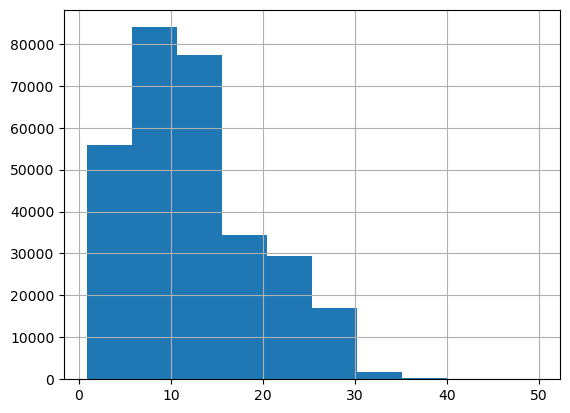

In [8]:
df.duration.hist()

<Axes: >

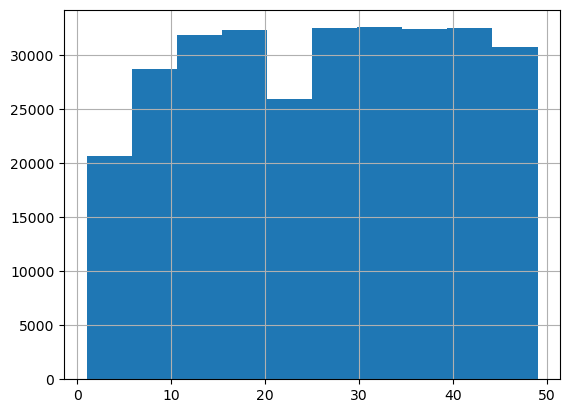

In [9]:
df.days_left.hist()

<Axes: >

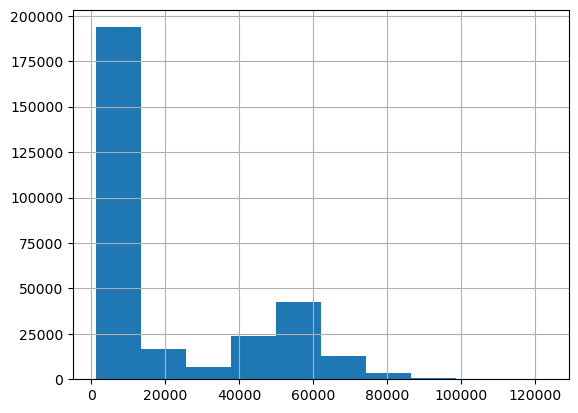

In [10]:
df.price.hist()

<Axes: >

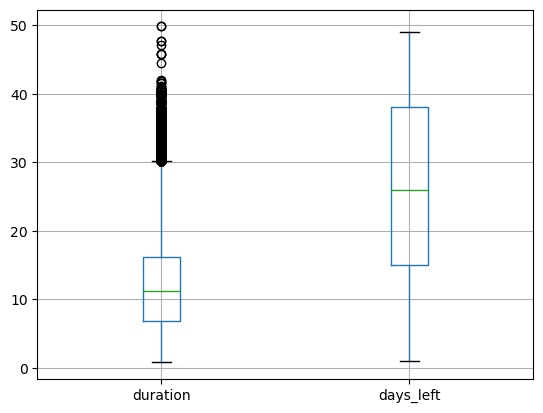

In [11]:
df.boxplot(column = ['duration', 'days_left'])

In [12]:
df[['duration', 'days_left', 'price']].corr()

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


<Axes: >

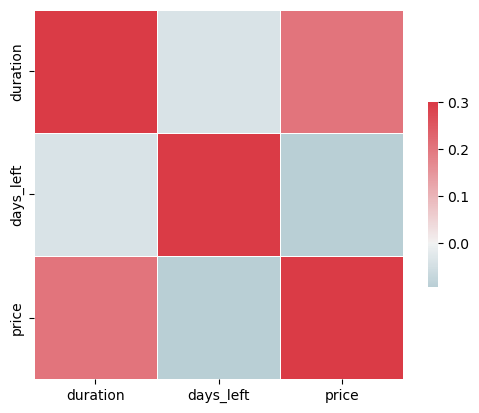

In [13]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['duration', 'days_left', 'price']].corr(), vmax =.3, center=0, cmap=cmap,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [14]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [15]:
df_categorical = df[['airline', 'source_city', 'departure_time', 'stops', 'destination_city', 'class']]

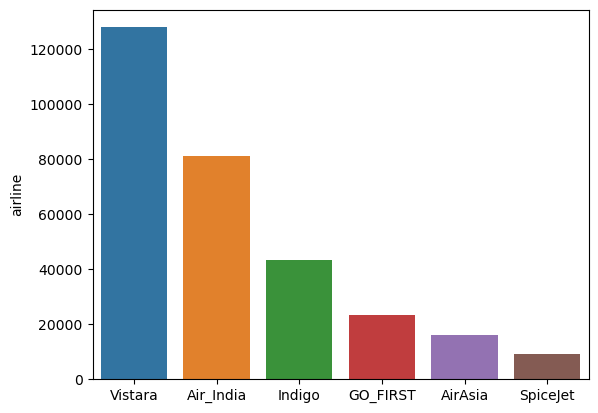

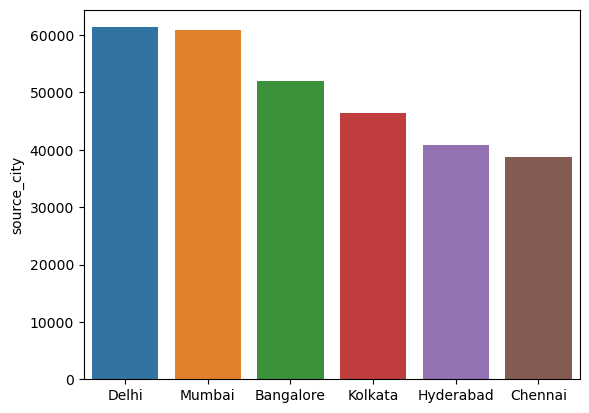

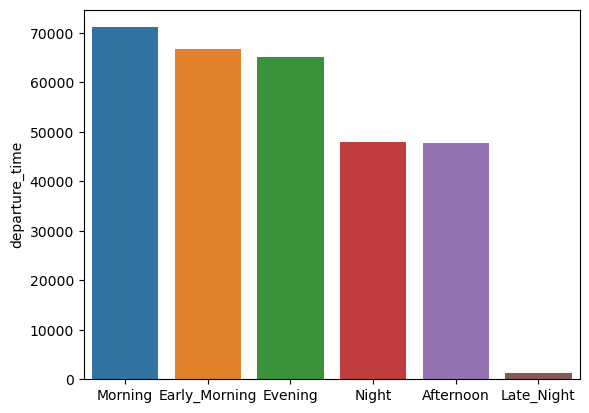

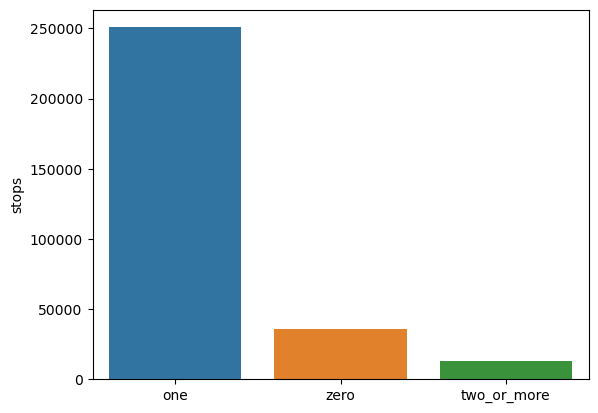

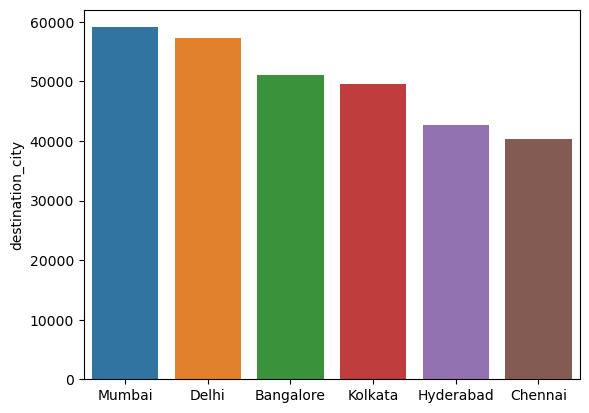

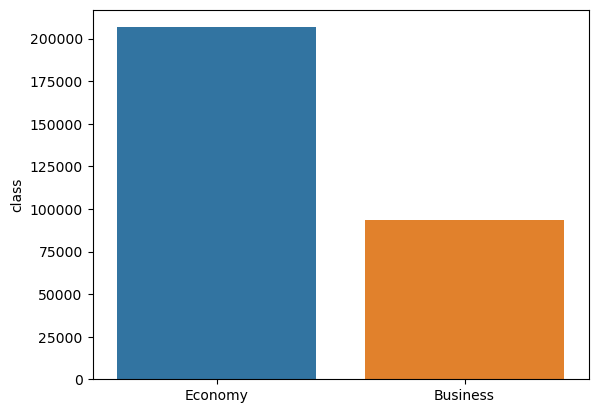

In [16]:
for i in df_categorical.columns:
    cat_num = df_categorical[i].value_counts()
    sns.barplot(x=cat_num.index, y=cat_num)
    plt.show()

In [17]:
Does price vary with Airlines?

Object `Airlines` not found.


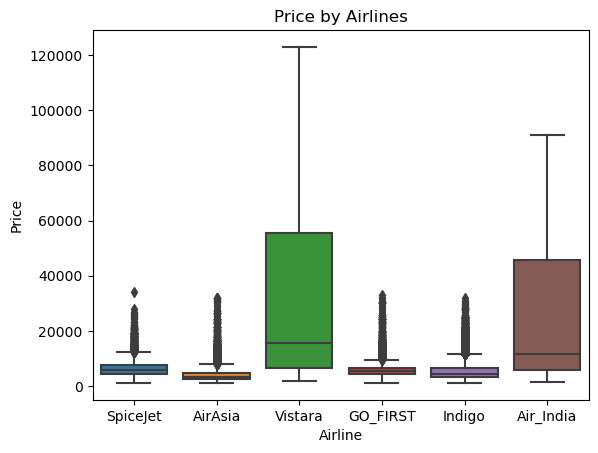

In [18]:
sns.boxplot(x='airline', y='price', data=df)
plt.title('Price by Airlines')
plt.xlabel('Airline')
plt.ylabel('Price');

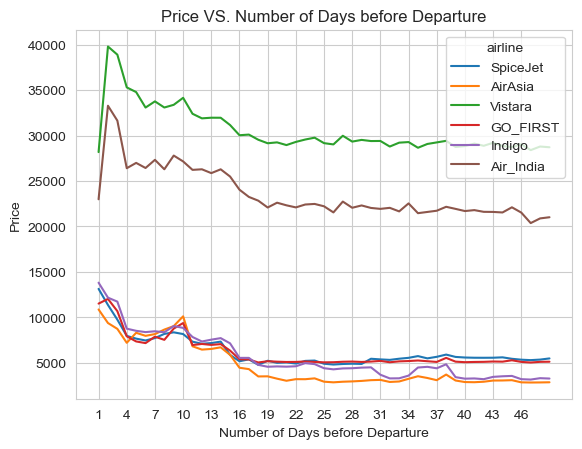

In [19]:
sns.set_style('whitegrid')
sns.lineplot(x='days_left', y='price', hue='airline', data=df, errorbar=None)
plt.xticks(range(df['days_left'].min(), df['days_left'].max(), 3))
plt.title('Price VS. Number of Days before Departure')
plt.ylabel('Price')
plt.xlabel('Number of Days before Departure');

In [20]:
pd.pivot_table(df, index = ['class', 'airline'], values = 'price')

price
class    airline                
Business Air_India  47131.039212
         Vistara    55477.027777
Economy  AirAsia     4091.072742
         Air_India   7313.682169
         GO_FIRST    5652.007595
         Indigo      5324.216303
         SpiceJet    6179.278881
         Vistara     7806.943645

In [21]:
pd.pivot_table(df, index = ['stops', 'source_city', 'destination_city'] , values = 'price')

price
stops source_city destination_city              
one   Bangalore   Chennai           25679.430625
                  Delhi             18854.887192
                  Hyderabad         23809.756654
                  Kolkata           26144.031214
                  Mumbai            25806.215613
...                                          ...
zero  Mumbai      Bangalore          7369.560513
                  Chennai            8975.697802
                  Delhi             10969.784100
                  Hyderabad          7232.047865
                  Kolkata           10672.198285

[90 rows x 1 columns]

In [22]:
df.groupby(['airline']).size()

airline
AirAsia       16098
Air_India     80892
GO_FIRST      23173
Indigo        43120
SpiceJet       9011
Vistara      127859
dtype: int64

In [23]:
df.groupby(['source_city']).size()

source_city
Bangalore    52061
Chennai      38700
Delhi        61343
Hyderabad    40806
Kolkata      46347
Mumbai       60896
dtype: int64

In [24]:
df.groupby(['departure_time']).size()

departure_time
Afternoon        47794
Early_Morning    66790
Evening          65102
Late_Night        1306
Morning          71146
Night            48015
dtype: int64

In [25]:
df.groupby(['stops']).size()

stops
one            250863
two_or_more     13286
zero            36004
dtype: int64

In [26]:
df.groupby(['arrival_time']).size()

arrival_time
Afternoon        38139
Early_Morning    15417
Evening          78323
Late_Night       14001
Morning          62735
Night            91538
dtype: int64

In [27]:
df.groupby(['destination_city']).size()

destination_city
Bangalore    51068
Chennai      40368
Delhi        57360
Hyderabad    42726
Kolkata      49534
Mumbai       59097
dtype: int64

In [28]:
df.groupby(['class']).size()

class
Business     93487
Economy     206666
dtype: int64

In [29]:
df.groupby(['duration']).size()

duration
0.83      52
0.92      78
1.00     377
1.08     553
1.17     960
        ... 
44.50      1
45.83      3
47.08      1
47.75      2
49.83      2
Length: 476, dtype: int64

In [30]:
df.groupby(['days_left']).size()

days_left
1     1927
2     4026
3     4248
4     5077
5     5392
6     5740
7     5703
8     5767
9     5665
10    5822
11    6417
12    6381
13    6404
14    6349
15    6340
16    6272
17    6419
18    6602
19    6537
20    6502
21    6479
22    6494
23    6401
24    6542
25    6633
26    6573
27    6360
28    6522
29    6397
30    6501
31    6534
32    6585
33    6532
34    6412
35    6291
36    6490
37    6476
38    6512
39    6593
40    6531
41    6525
42    6497
43    6472
44    6436
45    6314
46    6160
47    6069
48    6078
49    6154
dtype: int64

In [31]:
df.groupby(['price']).size()

price
1105      300
1106        7
1443      180
1444       14
1526       20
         ... 
114705      1
115211      1
116562      1
117307      1
123071      1
Length: 12157, dtype: int64

In [32]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [33]:
le = preprocessing.LabelEncoder()
df['airline'] = le.fit_transform(df['airline'])

In [34]:
le = preprocessing.LabelEncoder()
df['source_city'] = le.fit_transform(df['source_city'])

In [35]:
le = preprocessing.LabelEncoder()
df['departure_time'] = le.fit_transform(df['departure_time'])

In [36]:
le = preprocessing.LabelEncoder()
df['stops'] = le.fit_transform(df['stops'])

In [37]:
le = preprocessing.LabelEncoder()
df['arrival_time'] = le.fit_transform(df['arrival_time'])

In [38]:
le = preprocessing.LabelEncoder()
df['destination_city'] = le.fit_transform(df['destination_city'])

In [39]:
le = preprocessing.LabelEncoder()
df['class'] = le.fit_transform(df['class'])

In [40]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,SG-8709,2,2,2,5,5,1,2.17,1,5953
1,4,SG-8157,2,1,2,4,5,1,2.33,1,5953
2,0,I5-764,2,1,2,1,5,1,2.17,1,5956
3,5,UK-995,2,4,2,0,5,1,2.25,1,5955
4,5,UK-963,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,5,UK-822,1,4,0,2,3,0,10.08,49,69265
300149,5,UK-826,1,0,0,5,3,0,10.42,49,77105
300150,5,UK-832,1,1,0,5,3,0,13.83,49,79099
300151,5,UK-828,1,1,0,2,3,0,10.00,49,81585


In [41]:
df = df.drop(['flight'], axis=1)
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,5,1,4,0,2,3,0,10.08,49,69265
300149,5,1,0,0,5,3,0,10.42,49,77105
300150,5,1,1,0,5,3,0,13.83,49,79099
300151,5,1,1,0,2,3,0,10.00,49,81585


In [42]:
X = df.drop(['price'], axis=1)
X

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,4,2,2,2,5,5,1,2.17,1
1,4,2,1,2,4,5,1,2.33,1
2,0,2,1,2,1,5,1,2.17,1
3,5,2,4,2,0,5,1,2.25,1
4,5,2,4,2,4,5,1,2.33,1
...,...,...,...,...,...,...,...,...,...
300148,5,1,4,0,2,3,0,10.08,49
300149,5,1,0,0,5,3,0,10.42,49
300150,5,1,1,0,5,3,0,13.83,49
300151,5,1,1,0,2,3,0,10.00,49


In [43]:
y = df[('price')]
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64

In [70]:
mmscaler=MinMaxScaler(feature_range =(0,1))
X_train = mmscaler.fit_transform(X_train)
X_test = mmscaler.fit_transform(X_test)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [71]:
Results = pd.DataFrame()

In [72]:
#Creating a function to calculate Mean Absolute Percentage Error(MAPE)
def MAPE(y_test, y_pred):
  y_test, y_pred = np.array(y_test), np.array(y_pred)
  return np.mean(np.abs((y_test-y_pred)/y_pred))*100

In [73]:
#Creating a function to calculate different statstical numbers:
def Result_Stat(X_train, y_train,X_test, y_test,models):

   #Predict model with test data.
   y_pred = models.predict(X_test)
   #Print model name
   print("Model Name: ",models)
   print("Mean Absolute Error_MAE: ",round(mean_absolute_error(y_test, y_pred),3))
   print("Mean Squared Error_MSE: ",round(mean_squared_error(y_test, y_pred),3))
   print("Root Mean Squared Error_RMSE: ",round(np.sqrt(mean_absolute_error(y_test, y_pred)),3))
   print("R2_Score: ",round(r2_score(y_test, y_pred),3))
   print("Root Mean Squared Log Error (RMSLE): ",round(np.log(np.sqrt(mean_absolute_error(y_test, y_pred))),3))
   result = MAPE(y_test,y_pred)
   print("Mean Absolute Error Percentage: ", round(result,2),'%')
   r_squared = round(r2_score(y_test,y_pred),2)
   adjusted_r_square = round(1-(1-r_squared) * (len(y)-1)/ (len(y)-X.shape[1]-1),2)
   print("------------------------------------------------------------------------")
   new_row ={
       "Model Name":models,
       'Mean_Absolute_Error_MAE': mean_absolute_error(y_test, y_pred),
       'Mean_Squared_Error_MSE':mean_squared_error(y_test, y_pred),
       "Root_Mean_Squared_Error_RMSE":np.sqrt(mean_absolute_error(y_test, y_pred)),
       "Adj_R_Square":adjusted_r_square,
       "Root_Mean_Squared_Error_Percentage_MAPE":result,
       "Root_Mean_Squared_Log_Error_RMSLE":np.log(np.sqrt(mean_absolute_error(y_test, y_pred))),
       "R2_Score": r_squared
       }
   return new_row

In [ ]:
modelmlg = LinearRegression()
print("Linear regression model fitting")
modelmlg.fit(X_train,y_train)
print("Linear Regression Model Test Result\n")
Results = Results.append(Result_Stat(X_train = X_train, y_train = y_train, X_test=X_test,y_test=y_test, models = modelmlg), ignore_index=True)

modeldcr = DecisionTreeRegressor()
print("Decision Tree Regression model fitting")
modeldcr.fit(X_train, y_train)
Results = Results.append(Result_Stat(X_train = X_train, y_train = y_train, X_test=X_test,y_test=y_test, models = modeldcr), ignore_index=True)


modelbag = BaggingRegressor()

print("Bagging Boosting Regressor Model Training")
modelbag.fit(X_train, y_train)
result = Result_Stat(X_train = X_train, y_train = y_train, X_test=X_test,y_test=y_test, models = modelbag)
Results = Results.append(result, ignore_index=True)


modelrfr = RandomForestRegressor()
print("Random Forest Regressor Model Training")
modelrfr.fit(X_train, y_train)
result = Result_Stat(X_train = X_train, y_train = y_train, X_test=X_test,y_test=y_test, models = modelrfr)
Results = Results.append(result, ignore_index=True)


modelXGR = xgb.XGBRegressor()
print("XGB Regressor Model Training")
modelXGR.fit(X_train, y_train)
result = Result_Stat(X_train = X_train, y_train = y_train, X_test=X_test,y_test=y_test, models = modelXGR)
Results = Results.append(result, ignore_index=True)

modelKNN = KNeighborsRegressor(n_neighbors=5)
print("K Neighbour Regressor Model Training")
modelKNN.fit(X_train, y_train)
result = Result_Stat(X_train = X_train, y_train = y_train, X_test=X_test,y_test=y_test, models = modelKNN)
Results = Results.append(result, ignore_index=True)

modelETR  = ExtraTreesRegressor()
print("Extra Tree Regressor Model Training")
modelETR.fit(X_train, y_train)
result = Result_Stat(X_train = X_train, y_train = y_train, X_test=X_test,y_test=y_test, models = modelETR)
Results = Results.append(result, ignore_index=True)

modelRE = Ridge()
print("Ridge Model Training")
modelRE.fit(X_train, y_train)
result = Result_Stat(X_train = X_train, y_train = y_train, X_test=X_test,y_test=y_test, models = modelRE)
Results = Results.append(result, ignore_index=True)

modelHGB = HistGradientBoostingRegressor()
print("HGB Regressor Model Training")
modelHGB.fit(X_train, y_train)
result = Result_Stat(X_train = X_train, y_train = y_train, X_test=X_test,y_test=y_test, models = modelHGB)
Results = Results.append(result, ignore_index=True)


modelLO = linear_model.Lasso(alpha = 0.1)
print("Lasso Model Training")
modelLO.fit(X_train, y_train)
result = Result_Stat(X_train = X_train, y_train = y_train, X_test=X_test,y_test=y_test, models = modelLO)
Results = Results.append(result, ignore_index=True)

modelGBR = GradientBoostingRegressor(loss='squared_error', random_state = 42,learning_rate=0.1, n_estimators=100,criterion='friedman_mse',
                                     min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, 
                                     init=None,  max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, 
                                     warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)


print("Gradient Boosting Regressor model Training")
modelGBR.fit(X_train, y_train)
result = Result_Stat(X_train = X_train, y_train = y_train, X_test=X_test,y_test=y_test, models = modelGBR)
Results = Results.append(result, ignore_index=True)

In [75]:
Results.sort_values(by = 'R2_Score', ascending=False)

,Model Name,Mean_Absolute_Error_MAE,Mean_Squared_Error_MSE,Root_Mean_Squared_Error_RMSE,Adj_R_Square,Root_Mean_Squared_Error_Percentage_MAPE,Root_Mean_Squared_Log_Error_RMSLE,R2_Score
3,"(DecisionTreeRegressor(max_features=1.0, rando...",2036.422139,1.792732e+07,45.126734,0.97,11.647907,3.809475,0.97
5,KNeighborsRegressor(),1968.483235,1.576663e+07,44.367592,0.97,11.767871,3.792509,0.97
6,"(ExtraTreeRegressor(random_state=1402481934), ...",1822.355222,1.510343e+07,42.689053,0.97,10.804069,3.753943,0.97
2,(DecisionTreeRegressor(random_state=1761383086...,2086.773337,1.907608e+07,45.681214,0.96,11.962760,3.821687,0.96
4,"XGBRegressor(base_score=None, booster=None, ca...",2510.629415,1.898139e+07,50.106181,0.96,21.168129,3.914144,0.96
8,HistGradientBoostingRegressor(),2511.291880,1.817855e+07,50.112792,0.96,17.240049,3.914276,0.96
1,DecisionTreeRegressor(),2291.691645,2.737649e+07,47.871616,0.95,13.227262,3.868523,0.95
10,([DecisionTreeRegressor(criterion='friedman_ms...,2977.963119,2.468047e+07,54.570717,0.95,19.450937,3.999497,0.95
0,LinearRegression(),4635.477963,4.882656e+07,68.084344,0.91,162.214099,4.220747,0.91
7,Ridge(),4635.503711,4.882657e+07,68.084534,0.91,129.774855,4.220750,0.91
